# Stock-Tweets Exploratory Data Analysis

In [1]:
############### Initialize ###################

# Basics
from pymongo import MongoClient
import os
import numpy as np
import pandas as pd
import time

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


In [2]:
#Setup Mongo and create the database and collection
User = os.environ['MONGODB_USER']
password = os.environ['MONGODB_PASS']

client = MongoClient('34.204.99.255', username=User, password=password)
db = client['stock_tweets']

#Grab references
twitter_coll_reference = db.twitter
iex_coll_reference = db.iex

### Twitter Data

In [3]:
#Test to make sure connection is working.
twitter_coll_reference.count()

172275

In [4]:
# Create Data Frame
twitter_data = pd.DataFrame(list(twitter_coll_reference.find()))
twitter_data.head()

,Company,_id,created_at,favorite_count,id_str,lang,quote_count,reply_count,retweet_count,retweeted,text,user_followers_count,user_name,user_screen_name,user_statuses_count
0,[TSLA],5aa6c1ccb60e700001ed139d,Mon Mar 12 18:07:08 +0000 2018,0,973259109133778948,en,0,0,0,False,$TSLA so nice so obvious...,1703,TradeTherapAnalytics,TradeTexasBig,67528
1,[AAPL],5aa6c1d7b60e700001ed139e,Mon Mar 12 18:07:19 +0000 2018,0,973259155925434370,en,0,0,0,False,@JoKiddo But how proprietary is that? Does it ...,2901,Gilmo Report,gilmoreport,18524
2,"[AAPL, GOOG, GOOGL]",5aa6c1dcb60e700001ed139f,Mon Mar 12 18:07:23 +0000 2018,0,973259173524918272,en,0,0,0,False,RT @StockTwits: This is the race to $1 trillio...,5256,Mark Hill,MarketsHill,13523
3,[AAPL],5aa6c1ddb60e700001ed13a0,Mon Mar 12 18:07:25 +0000 2018,0,973259179040362496,en,0,0,0,False,$AAPL may be working on a MacBook Air Pro. htt...,486,William White,WilliamWhiteIP,7850
4,[TWTR],5aa6c1e1b60e700001ed13a1,Mon Mar 12 18:07:29 +0000 2018,0,973259197189107713,en,0,0,0,False,In 300 shares of $TWTR at $35.42,979,Ross,VeeDub78,40293


In [5]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172275 entries, 0 to 172274
Data columns (total 15 columns):
Company                 172275 non-null object
_id                     172275 non-null object
created_at              172275 non-null object
favorite_count          172275 non-null int64
id_str                  172275 non-null object
lang                    172275 non-null object
quote_count             172275 non-null int64
reply_count             172275 non-null int64
retweet_count           172275 non-null int64
retweeted               172275 non-null bool
text                    172275 non-null object
user_followers_count    172275 non-null int64
user_name               172275 non-null object
user_screen_name        172275 non-null object
user_statuses_count     172275 non-null int64
dtypes: bool(1), int64(6), object(8)
memory usage: 18.6+ MB


In [6]:
# Need to convert the created_at to a time stamp
twitter_data.index=pd.to_datetime(twitter_data['created_at'])

In [7]:
twitter_data.head()

,Company,_id,created_at,favorite_count,id_str,lang,quote_count,reply_count,retweet_count,retweeted,text,user_followers_count,user_name,user_screen_name,user_statuses_count
created_at,,,,,,,,,,,,,,,
2018-03-12 18:07:08,[TSLA],5aa6c1ccb60e700001ed139d,Mon Mar 12 18:07:08 +0000 2018,0,973259109133778948,en,0,0,0,False,$TSLA so nice so obvious...,1703,TradeTherapAnalytics,TradeTexasBig,67528
2018-03-12 18:07:19,[AAPL],5aa6c1d7b60e700001ed139e,Mon Mar 12 18:07:19 +0000 2018,0,973259155925434370,en,0,0,0,False,@JoKiddo But how proprietary is that? Does it ...,2901,Gilmo Report,gilmoreport,18524
2018-03-12 18:07:23,"[AAPL, GOOG, GOOGL]",5aa6c1dcb60e700001ed139f,Mon Mar 12 18:07:23 +0000 2018,0,973259173524918272,en,0,0,0,False,RT @StockTwits: This is the race to $1 trillio...,5256,Mark Hill,MarketsHill,13523
2018-03-12 18:07:25,[AAPL],5aa6c1ddb60e700001ed13a0,Mon Mar 12 18:07:25 +0000 2018,0,973259179040362496,en,0,0,0,False,$AAPL may be working on a MacBook Air Pro. htt...,486,William White,WilliamWhiteIP,7850
2018-03-12 18:07:29,[TWTR],5aa6c1e1b60e700001ed13a1,Mon Mar 12 18:07:29 +0000 2018,0,973259197189107713,en,0,0,0,False,In 300 shares of $TWTR at $35.42,979,Ross,VeeDub78,40293


In [8]:
# Group by every hour and then plot how many tweets get an hour
hourly = twitter_data.groupby(pd.Grouper(freq="H")).count()['_id'].to_frame()
hourly.columns = ['Count']
hourly.head()

,Count
created_at,
2018-03-12 18:00:00,428
2018-03-12 19:00:00,465
2018-03-12 20:00:00,532
2018-03-12 21:00:00,0
2018-03-12 22:00:00,0


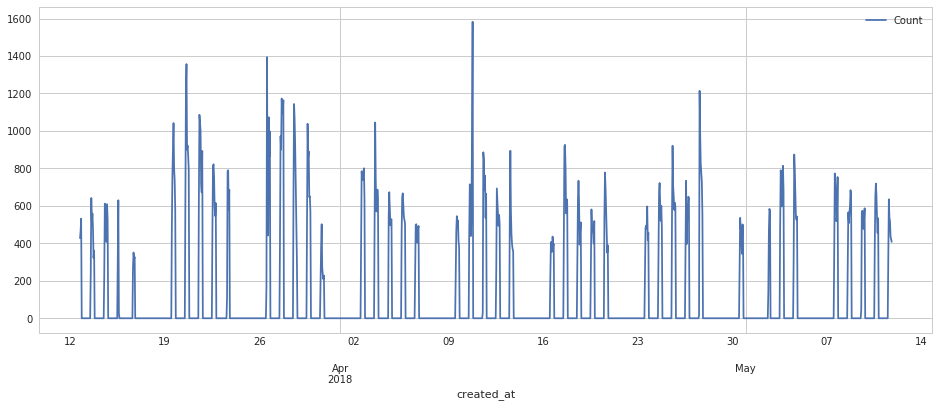

In [23]:
hourly.plot(figsize=(16,6))

In [10]:
# Want to show tweets grouped by company.
# Challenge is sometimes single tweet contains multiple companies.
# Goal group by each company

# Iterate through each row and simply create a dictionary that counts each item in the list
company_count = {}

for item in twitter_data.itertuples():
    #print item
    for company in item[1]:
        company_count[company] = company_count.get(company,0)+1

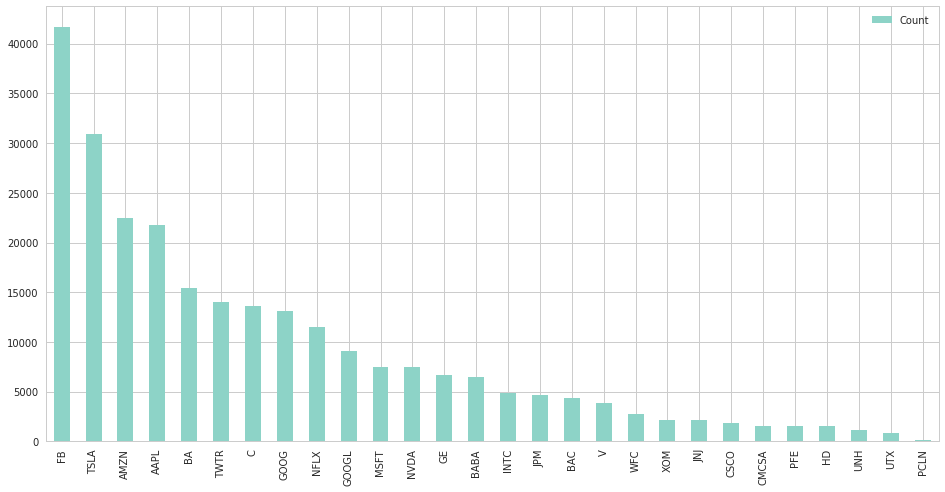

In [22]:
# Number of tweets by company
company_count_df = pd.DataFrame.from_dict(company_count, orient='index')
company_count_df.columns=['Count']
company_count_df.sort_values(by='Count', ascending=False).plot(kind='bar', figsize=(16,8), cmap='Set3')


In [ ]:
# Box Plot showing counts


In [41]:
# Get unique company list.
# Need this because dont want to be predicting stock prices of companies not in the list. 
def get_unique_company(array):
    try:
        return list(set(array))
    except:
        return False

hourly['company'] = twitter_data.groupby(pd.Grouper(freq="H"))['Company'].sum()
hourly['ucompany'] = hourly['company'].apply(lambda x: get_unique_company(x))

In [42]:
hourly.head()

,Count,text,company,ucompany
created_at,,,,
2018-03-12 18:00:00,428,$TSLA so nice so obvious...@JoKiddo But how pr...,"[TSLA, AAPL, AAPL, GOOG, GOOGL, AAPL, TWTR, NF...","[NVDA, NFLX, C, GOOGL, GE, CMCSA, BA, BABA, TW..."
2018-03-12 19:00:00,465,Estate asset watch: today's upside price surpr...,"[TSLA, BA, BABA, NFLX, AAPL, AMZN, BAC, BA, JP...","[NVDA, NFLX, C, GOOGL, GE, CMCSA, BA, BABA, UN..."
2018-03-12 20:00:00,532,It's extremely difficult to reverse engineer a...,"[NFLX, FB, BA, BABA, FB, NVDA, NFLX, TSLA, AAP...","[NVDA, NFLX, C, GOOGL, GE, CMCSA, BA, BABA, UN..."
2018-03-12 21:00:00,0,False,False,False
2018-03-12 22:00:00,0,False,False,False


In [26]:
# Concatenate the text
hourly['text']=twitter_data.groupby(pd.Grouper(freq="H"))['text'].sum()
# Number of Users
hourly['Number_of_Users'] = twitter_data.groupby(pd.Grouper(freq="H"))['user_name'].nunique()



### Stock Data

In [10]:
#Test to make sure connection is working.
iex_coll_reference.count()

442054

In [11]:
stock_data = pd.DataFrame(list(iex_coll_reference.find()))
stock_data.head()

,Ticker,_id,companyName,high,latestPrice,latestUpdate,latestVolume,low,marketCap,open,peRatio,previousClose,sector,week52High,week52Low,ytdChange
0,AAPL,5aa6c1ee12035200013785b3,Apple Inc.,182.20,181.730,2018-03-12 18:07:31,22006161,180.21,922100382490,180.23,19.75,179.98,Technology,181.730,138.62,0.044816
1,FB,5aa6c1ee12035200013785b4,Facebook Inc.,186.10,185.460,2018-03-12 18:07:22,9955873,184.22,538761440579,185.26,30.16,185.23,Technology,195.320,137.60,0.021001
2,GOOG,5aa6c1ee12035200013785b5,Alphabet Inc.,1177.05,1172.005,2018-03-12 18:06:08,1353262,1157.42,814892181648,1163.85,47.14,1160.04,Technology,1186.890,803.37,0.089239
3,GOOGL,5aa6c1ee12035200013785b6,Alphabet Inc.,1178.16,1173.880,2018-03-12 18:07:13,1586022,1159.20,816195864516,1165.00,36.67,1160.84,Technology,1198.000,824.30,0.081652
4,AMZN,5aa6c1ef12035200013785b7,Amazon.com Inc.,1605.33,1600.745,2018-03-12 18:07:10,3518847,1586.70,774932152651,1592.60,351.04,1578.89,Technology,1600.745,833.50,0.327903
